In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

[[3.44637167 0.08984155]
 [0.08984155 0.01387543]] [[18.57262453  3.53808497]
 [-0.          0.14977893]] [[2818.8         352.87986605]
 [   0.           37.8       ]]
t_critical:
 0.03493516772903462


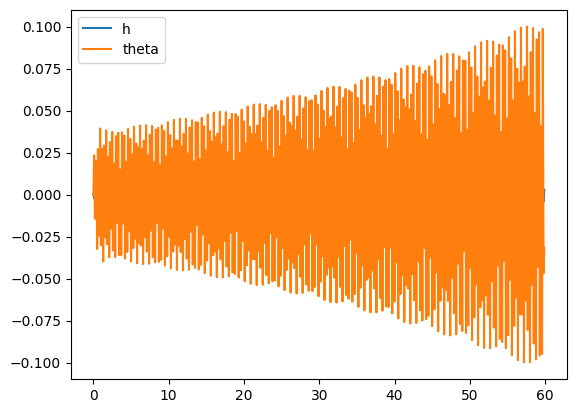

In [ ]:
U = 19
m = 3.3843
Sa = 0.0859
Ia = 0.0135
rho = 1.225
c = 0.2540
b = c / 2
a = -0.5  # Fixed indentation
Kh = 2818.8
Ka = 37.8
Ch, Ca = 0, 0

M = np.array([[m + np.pi*rho*b**2, Sa-np.pi*rho*b**3*a], [Sa-np.pi*rho*b**3*a, Ia+np.pi*rho*b**4*(1/8+a**2)]])
C = np.array([[Ch + 2*np.pi*rho*b*U, np.pi*rho*b**2*U + 2*np.pi*rho*b**2*U*(0.5-a)], [-2*np.pi*rho*b**2*U*(a+0.5), Ca-2*np.pi*rho*b**3*U*(0.5-a)*(a+0.5)+np.pi*rho*b**3*U*(0.5-a)]])
K = np.array([[Kh, 2*np.pi*rho*b*U**2], [0, Ka - 2*np.pi*rho*b**2*U**2*(a+0.5)]])

#---------Input damping coefficients----------#
# alpha_d = 0 
# beta_d = 0
# C = alpha_d*M+beta_d*K
ft = 0                                      #Input initial time
f_0 = np.array([0.06*math.cos(ft), 1])     #Input Force vector
N = 600                                       #Input Number of iterations

#---------Input Newmark Beta constants----------#
gamma = 0.5 
beta = 0.25

#---------Check critical time step---------#
[om,ve]=np.linalg.eig(np.linalg.inv(M)*K)
omega = math.sqrt(max(om))
T_min = 2/omega
print("t_critical:\n", T_min)

t = 0.1                                      #Input time step

q = np.zeros((N, 2))
v = np.zeros((N, 2))
a = np.zeros((N, 2))
T = np.zeros((N, 2))


q[0, :] = np.array([0, 0])  
v[0, :] = np.array([0, 0])  
a[0, :] = np.linalg.inv(M).dot(f_0 - C.dot(v[0,:])-K.dot(q[0, :]))  


P1 = np.linalg.inv(M / (beta * t**2) + C*gamma / (beta* t) + K)
P2 = (1 - 2 * beta) * M / (2 * beta) + (gamma-2*beta) * t * C/ (2 * beta)
P3 = M / (beta * t) + (gamma - beta) * C / beta
P4 = M / (beta * t**2) + C*gamma / (beta* t)


for i in range(1, N):
    T[i,:] = T[i-1,:] + [t, t]
    # ft=i*t
    fo = np.array([0.016*math.cos(ft)*0, 0*1])          #Input Force vector
    q[i, :] = P1.dot(fo + P2.dot(a[i-1, :]) + P3.dot(v[i-1, :]) + P4.dot(q[i-1, :]))
  
    v[i, :] = ((2 * beta - gamma) * t * a[i-1, :] / (2 * beta) + 
               (beta - gamma) * v[i-1, :] / beta - 
               gamma * q[i-1, :] / (beta * t) + 
               gamma * q[i, :] / (beta * t))
    

    a[i, :] = ((2 * beta - 1) * a[i-1, :] / (2 * beta) - 
               v[i-1, :] / (beta * t) - 
               q[i-1, :] / (beta * t**2) + 
               q[i, :] / (beta * t**2))


# print("Displacements:\n", q)
# print("Velocities:\n", v)
# print("Accelerations:\n", a)

plt.plot(T,q)
plt.legend(["h","theta"])

